# Classification


In [1]:
import pandas as pd
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()


In [2]:
X = digits["data"]
y = digits["target"]

In [3]:
pd.Series(y).value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [5]:
X_train.shape

(1437, 64)

In [6]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {
    "svm": LinearSVC(),
    "logistic": LogisticRegression(solver='lbfgs', max_iter=2000),
    "forest": RandomForestClassifier()
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)



Training model: svm
Training model: logistic


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training model: forest


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
#display(y_test.reshape(-1, 1))


d = {modelName:model.predict(X_test) for modelName, model in models.items()}


df = pd.DataFrame(d)
df["gt"] = y_test
df

,svm,logistic,forest,gt
0,9,9,9,9
1,7,7,7,7
2,0,0,0,0
3,1,1,1,1
4,2,2,2,2
...,...,...,...,...
355,7,7,7,7
356,1,1,1,1
357,7,7,7,7
358,6,6,6,6


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from IPython.core.display import display, HTML

switchColor = lambda value: f"<b style=\"color:orange\">{round(value,2)}</b>" if value < 0.8 else f"<b style=\"color:green\">{round(value,2)}</b>"
printBonito = lambda label,val: display(HTML(f"<span style=\"padding-left:20px\">The {label} is: {switchColor(val)}</span>"))

for modelName, model in models.items():    
    print(f"Evaluating model [{modelName}]:")
    printBonito("Accuracy", accuracy_score(df["gt"],df[modelName]))
    printBonito("Precision", precision_score(df["gt"],df[modelName],average='weighted'))
    printBonito("Recall", recall_score(df["gt"],df[modelName],average='weighted'))



    
    

Evaluating model [svm]:


Evaluating model [logistic]:


Evaluating model [forest]:


In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_scores_0 = models["logistic"].predict_proba(X_test)[:,0]
auc = roc_auc_score(y_test_0, y_scores_0)

# AUC for digit 0
auc

NameError: name 'y_test_0' is not defined

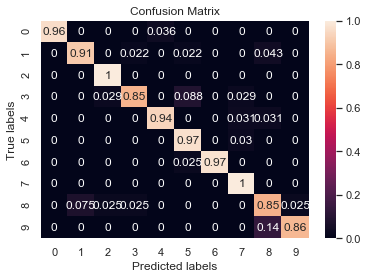

In [10]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd()))

from others.cmPlot import cmPlot

import seaborn as sns 
sns.set()

y_pred = models["logistic"].predict(X_test)
label = list(set(y))
cmPlot(y_pred,y_test,label)
